# Ecommerce Customers

The dataset used to perform linear regression is an Ecommerce dataset of a **clothing store company** that also have in-store style and clothing advice sessions.


The goal is to ***help the company decide if they should concentrate on their mobile app service or website***, based on the yearly amount spent by the customers to grow the business. So "Yearly Amount Spent" is a dependent variable and our target is to get it's value.


This information can be used to give the particular customer personalized offers or loyalty membership.

In [29]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# Read the data into a DataFrame
db_path = "data/"
df = pd.read_csv(db_path+"ecommerce_customers.csv")

In [9]:
df.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [10]:
df.describe()

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

In [15]:
ProfileReport(df, title="Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

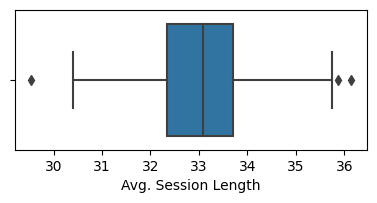

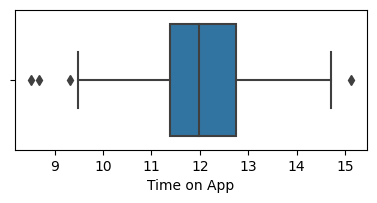

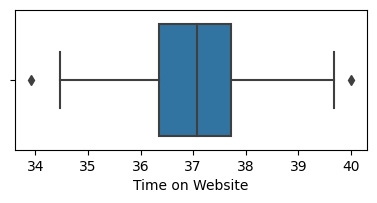

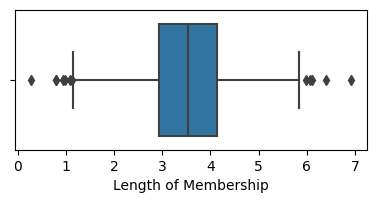

In [16]:
cols = ['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership'] 

for n, column in enumerate(cols):
    fig = plt.figure(figsize = (10, 4))
    ax = plt.subplot(2,2, n + 1)
    sns.boxplot(x=column , data=df)

From the report we can analyze that:
* Yearly Amount Spent, our traget has a normal distribution.
* Yearly Amount Spent has a high correlation with Length of Membership

In [17]:
# Split the data into independent variables (X) and the dependent variable (y)
y = df['Yearly Amount Spent']
X = df[cols]

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [23]:
# Create a linear regression model
lr_model = LinearRegression()
# Fit the model to the training data
lr_model.fit(X_train,y_train)

LinearRegression()

In [24]:
# Make predictions on the test data
y_pred = lr_model.predict(X_test)

In [26]:
X_test.head()

Avg. Session Length  Time on App  Time on Website  Length of Membership
304            33.914015    12.266504        36.575031              3.023474
340            31.816428    14.288015        36.773861              2.964498
47             32.726785    12.988510        36.462003              4.113226
67             32.805220    11.835476        36.375066              3.439591
479            34.606242    11.761884        38.126520              1.820811

In [28]:
y_pred[:5]

array([498.81705536, 519.53403729, 562.94886718, 478.90501346,
       423.8201042 ])

In [30]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# You can also print the model coefficients and intercept
print("Coefficients:", lr_model.coef_)
print("Intercept:", lr_model.intercept_)

Mean Squared Error: 80.90062369759966
R-squared: 0.9884637234896453
Coefficients: [25.82792018 38.80900145  0.28174274 61.30479927]
Intercept: -1048.8204290065078


Let's interpret the results:

1. **Mean Squared Error (MSE):** The MSE is a measure of the model's prediction accuracy. In this case, the MSE is approximately 80.90. It quantifies the average squared difference between the actual "Yearly Amount Spent" values in the test data and the values predicted by the model. Lower MSE values indicate a better fit, so 80.90 suggests that the model's predictions are relatively close to the actual values.

2. **R-squared (R2):** The R-squared value measures the goodness of fit of the model. It ranges from 0 to 1, where 1 indicates a perfect fit. In this case, the R-squared value is approximately 0.9885, which is very close to 1. This means that the model explains about 98.85% of the variance in the "Yearly Amount Spent." In simpler terms, it indicates that the model is an excellent fit for the data, and the independent variables (Avg. Session Length, Time on App, Time on Website, Length of Membership) explain a significant portion of the variance in the dependent variable.

3. **Coefficients:** The coefficients represent the weights assigned to each independent variable in the linear regression equation. They indicate how much a one-unit change in each independent variable affects the dependent variable (Yearly Amount Spent). In this case:
   - A one-unit increase in "Avg. Session Length" is associated with an increase of approximately 25.83 in "Yearly Amount Spent."
   - A one-unit increase in "Time on App" is associated with an increase of approximately 38.81 in "Yearly Amount Spent."
   - A one-unit increase in "Time on Website" is associated with an increase of approximately 0.28 in "Yearly Amount Spent."
   - A one-unit increase in "Length of Membership" is associated with a substantial increase of approximately 61.30 in "Yearly Amount Spent."

4. **Intercept:** The intercept is the value of the dependent variable (Yearly Amount Spent) when all independent variables are zero. In this case, the intercept is approximately -1048.82. It doesn't have a practical interpretation in this context since it's unlikely that all independent variables can be zero in a real-world scenario.

In summary, the linear regression model has performed very well with a high R-squared value, suggesting that it's a strong predictor of "Yearly Amount Spent." The coefficients indicate the relative importance of each independent variable, and they can be used to make predictions or guide business decisions. For example, "Length of Membership" has the most significant positive impact on yearly spending, followed by "Time on App" and "Avg. Session Length." "Time on Website" has a relatively weaker positive impact.

Based on the results and the stated goal of helping the company decide whether to concentrate on their mobile app service or website to grow the business, here are some conclusions and insights that can be drawn:

1. **Mobile App vs. Website:** The coefficients of the independent variables provide valuable insights into the impact of each factor on "Yearly Amount Spent." The coefficient for "Time on App" (approximately 38.81) is much larger than the coefficient for "Time on Website" (approximately 0.28). This suggests that customer engagement with the mobile app has a significantly greater positive impact on yearly spending compared to the website.

2. **Length of Membership:** The "Length of Membership" has the most substantial positive impact on yearly spending, with a coefficient of approximately 61.30. This indicates that customer loyalty and retention have a significant influence on increasing yearly spending. Therefore, the company should also focus on strategies to retain and engage long-term customers.

3. **Website Improvement:** While the mobile app appears to be a stronger driver of yearly spending, it doesn't mean the website should be neglected. The positive coefficient for "Time on Website" suggests that improving the website's user experience and engagement could still have a positive impact on yearly spending. The company should consider optimizing the website to make it more competitive with the app.

4. **Additional Factors:** It's important to note that this analysis is based on the provided dataset and its limited set of variables. There may be other unmeasured factors or interactions that influence customer spending. Therefore, further analysis and data collection may be needed to gain a more comprehensive understanding of customer behavior.

In conclusion, the linear regression analysis indicates that the mobile app is a stronger driver of yearly spending compared to the website. However, both the app and the website can contribute to the company's success, and a comprehensive strategy that considers the strengths of each channel is recommended. Additionally, fostering customer loyalty and engagement, as indicated by "Length of Membership," is a key factor in growing the business.